In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

# All Causes

In [2]:
df = pd.read_excel("all causes jpn.xlsx")
df = df[(df['Year'] > 1959) & (df['Year'] < 2020)]
df = df.sort_values(by="Year", ascending=True)
unique_years = df['Year'].unique()
print(f'number of years is {len(unique_years)}')

number of years is 60


In [3]:
df.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],706599.0,100.0,1048.155540,756.380160
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],377526.0,100.0,1249.502493,822.898321
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],329073.0,100.0,889.259859,692.189252
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],695644.0,100.0,1008.084488,737.809832
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],371858.0,100.0,1214.035615,803.079648
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],323786.0,100.0,850.532934,674.821283
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],710265.0,100.0,1016.215600,746.249133
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],380826.0,100.0,1235.289458,814.705631
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],329439.0,100.0,850.837612,680.181278
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],309301.0,100.0,783.871418,632.194175


In [4]:
#to see if there are any missing values and see what data types we have
print(df.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 199
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [5]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df = df.drop(columns=columns_to_remove)

In [6]:
columns_to_remove1 = ['Year','Percentage of cause-specific deaths out of total deaths']
dfstat = df.drop(columns=columns_to_remove1)
grouped_stats = dfstat.groupby('Sex').describe()
grouped_stats.to_excel('grouped_stats_jpn.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

This function tests the normality of a numeric variable, plots a histogram if it's non-normal, and performs statistical tests to compare the variable between different groups. If the variable is normally distributed, it conducts a t-test between groups, and if it's not normally distributed, it performs a Mann-Whitney U-test on the original or log-transformed data, as appropriate. Wilcoxon-Mann-Whitney Criterion is used when variable is not distributed normally and the t test is not suitable,

In [7]:
def test_distribution_and_compare_sexes(data, value_column, group_column, alpha=0.05):
    # Extract the specific column for testing
    data_to_test = data[value_column]
    
    # Perform the Shapiro-Wilk test on the original data
    stat, p = stats.shapiro(data_to_test)
    
    print(f'Shapiro-Wilk test p-value for {value_column}: {p}')

    if p > alpha:
        print(f'{value_column} is normally distributed.')
        
        # Perform a t-test for the difference between sexes
        group_male = data[data[group_column] == 'Male'][value_column]
        group_female = data[data[group_column] == 'Female'][value_column]
        
        t_stat, t_p_value = stats.ttest_ind(group_male, group_female)
        print("T-test for Men and Women:")
        print("T-statistic:", t_stat)
        print("p-value:", t_p_value)
        
        if t_p_value < alpha:
            print("Conclusion: There is a significant difference between Men and Women.")
        else:
            print("Conclusion: There is no significant difference between Men and Women.")
            
    else:
        # Transform the data using the natural logarithm
        log_data = np.log(data_to_test)
        
        # Perform the Shapiro-Wilk test on the log-transformed data
        log_stat, log_p = stats.shapiro(log_data)
        print(f'Shapiro-Wilk test p-value for log-transformed {value_column}: {log_p}')

        if log_p > alpha:
            print(f'Log-transformed {value_column} is approximately normally distributed.')
            
            # Plot a histogram of the initial variable when distribution is log-normal
            plt.hist(data_to_test, bins=20, color='blue', alpha=0.7)
            plt.title(f'Histogram of {value_column}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
            
            # Perform a t-test for the difference between sexes on the log-transformed data
            group_male_log = log_data[data[group_column] == 'Male']
            group_female_log = log_data[data[group_column] == 'Female']
        
            t_stat_log, t_p_value_log = stats.ttest_ind(group_male_log, group_female_log)
            print("T-test for Men and Women on log-transformed data:")
            print("T-statistic:", t_stat_log)
            print("p-value:", t_p_value_log)
        
            if t_p_value_log < alpha:
                print("Conclusion: There is a significant difference between Men and Women on log-transformed data.")
            else:
                print("Conclusion: There is no significant difference between Men and Women on log-transformed data.")
        else:
            print(f'Log-transformed {value_column} is also not normally distributed.')
            
            # Plot a histogram of the initial variable when non-normal
            plt.hist(data_to_test, bins=20, color='blue', alpha=0.7)
            plt.title(f'Histogram of {value_column}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
            
            # Perform a Mann-Whitney U-test for the difference between sexes on the initial data
            group_male = data[data[group_column] == 'Male'][value_column]
            group_female = data[data[group_column] == 'Female'][value_column]
        
            mw_stat, mw_p_value = stats.mannwhitneyu(group_male, group_female, alternative='two-sided')
        
            print(f"Mann-Whitney U-test for Men and Women on {value_column}:")
            print("Statistic:", mw_stat)
            print("p-value:", mw_p_value)
        
            if mw_p_value < alpha:
                print("Conclusion: There is a significant difference between Men and Women.")
            else:
                print("Conclusion: There is no significant difference between Men and Women.")


Shapiro-Wilk test p-value for Number: 3.698732292667373e-11
Shapiro-Wilk test p-value for log-transformed Number: 9.343375495518558e-07
Log-transformed Number is also not normally distributed.


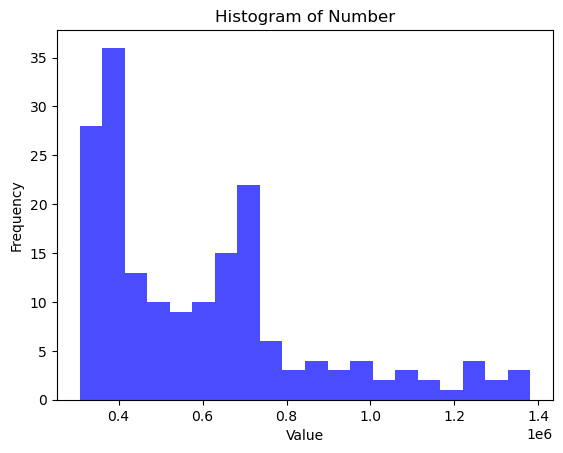

Mann-Whitney U-test for Men and Women on Number:
Statistic: 2504.0
p-value: 0.00022213249517686926
Conclusion: There is a significant difference between Men and Women.


In [8]:
test_distribution_and_compare_sexes(df, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 7.885022341724834e-07
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.011762240901589394
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


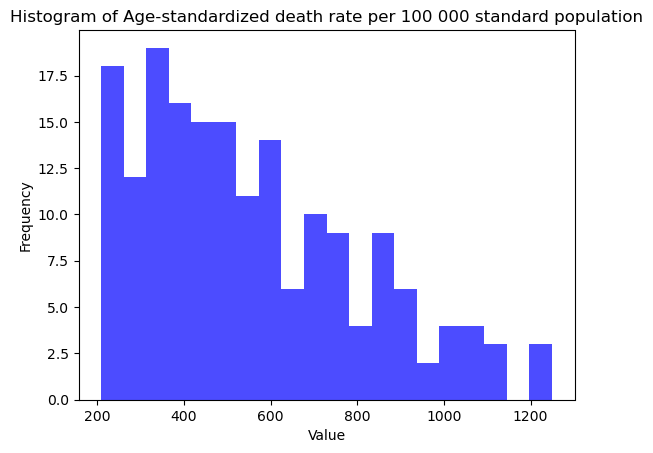

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 2898.0
p-value: 8.392423392985127e-09
Conclusion: There is a significant difference between Men and Women.


In [9]:
test_distribution_and_compare_sexes(df, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05) 

Shapiro-Wilk test p-value for Death rate per 100 000 population: 1.5258784458183072e-08
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 8.437132237304468e-06
Log-transformed Death rate per 100 000 population is also not normally distributed.


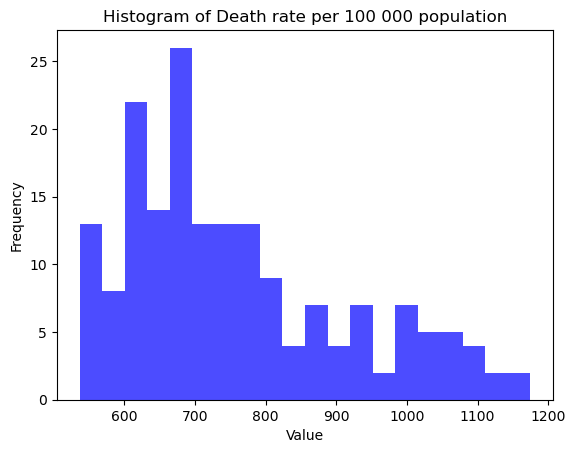

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 2855.0
p-value: 3.117799574384761e-08
Conclusion: There is a significant difference between Men and Women.


In [10]:
test_distribution_and_compare_sexes(df, 'Death rate per 100 000 population', 'Sex', alpha=0.05) 

Correlation analysis for the number of deaths and two rates:

In [11]:
def calculate_and_conclude_correlation(data, column1, column2, alpha=0.05):
    correlation = data[column1].corr(data[column2])

    print(f"Correlation between {column1} and {column2}: {correlation}")

    if abs(correlation) >= alpha:
        if correlation > 0:
            print(f"Conclusion: There is a significant positive correlation between {column1} and {column2}.")
        elif correlation < 0:
            print(f"Conclusion: There is a significant negative correlation between {column1} and {column2}.")
        else:
            print(f"Conclusion: There is no significant correlation between {column1} and {column2}.")
    else:
        print(f"Conclusion: There is no significant correlation between {column1} and {column2}.")

In [12]:
calculate_and_conclude_correlation(df, 'Number', 'Age-standardized death rate per 100 000 standard population', alpha=0.05)

Correlation between Number and Age-standardized death rate per 100 000 standard population: -0.3848140332059426
Conclusion: There is a significant negative correlation between Number and Age-standardized death rate per 100 000 standard population.


In [13]:
calculate_and_conclude_correlation(df, 'Number', 'Death rate per 100 000 population', alpha=0.05)

Correlation between Number and Death rate per 100 000 population: 0.5294529863947675
Conclusion: There is a significant positive correlation between Number and Death rate per 100 000 population.


# Communicable, maternal, perinatal and nutritional

In [14]:
df1 = pd.read_excel('Communicable, maternal, perinatal and nutritional jpn.xlsx')
df1 = df1[(df1['Year'] > 1959) & (df1['Year'] < 2020)]
df1 = df1.sort_values(by="Year", ascending=True)
df1.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],135521.0,19.179337,184.136063,145.068696
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],72711.0,19.259866,216.085980,158.489110
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],62810.0,19.086950,159.261589,132.117819
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],117617.0,16.907642,157.540178,124.746248
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],63327.0,17.029888,185.876744,136.763563
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],54290.0,16.767247,135.752900,113.148955
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],122441.0,17.238777,165.258119,128.644225
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],66170.0,17.375389,199.550937,141.558275
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],56271.0,17.080856,140.117469,116.180782
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],43693.0,14.126369,105.818818,89.306081


In [15]:
#to see if there are any missing values and see what data types we have
print(df1.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 199
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [16]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df1 = df1.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df1stat = df1.drop(columns=columns_to_remove1)
grouped_stats1 = df1stat.groupby('Sex').describe()
grouped_stats1.to_excel('grouped_stats comm jpn.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 7.051569328453411e-10
Shapiro-Wilk test p-value for log-transformed Number: 0.0039800554513931274
Log-transformed Number is also not normally distributed.


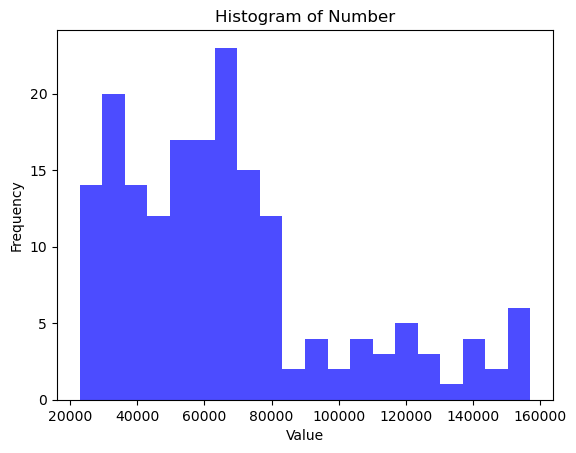

Mann-Whitney U-test for Men and Women on Number:
Statistic: 2332.0
p-value: 0.005276479906397268
Conclusion: There is a significant difference between Men and Women.


In [17]:
test_distribution_and_compare_sexes(df1, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 4.8584350764713236e-08
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 0.00032572069903835654
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


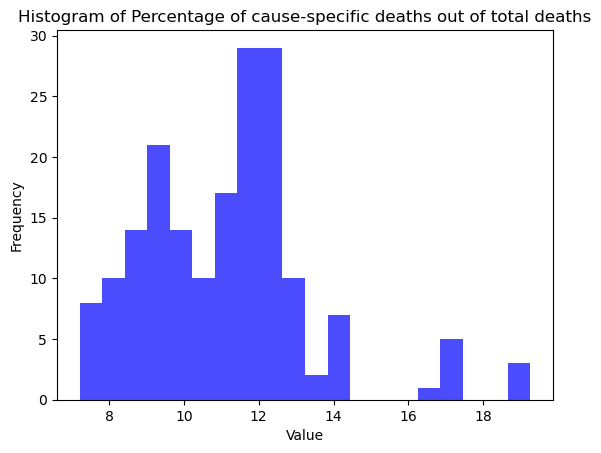

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 1936.0
p-value: 0.47696615826164
Conclusion: There is no significant difference between Men and Women.


In [18]:
test_distribution_and_compare_sexes(df1, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 5.24127833148591e-13
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.1247355118393898
Log-transformed Age-standardized death rate per 100 000 standard population is approximately normally distributed.


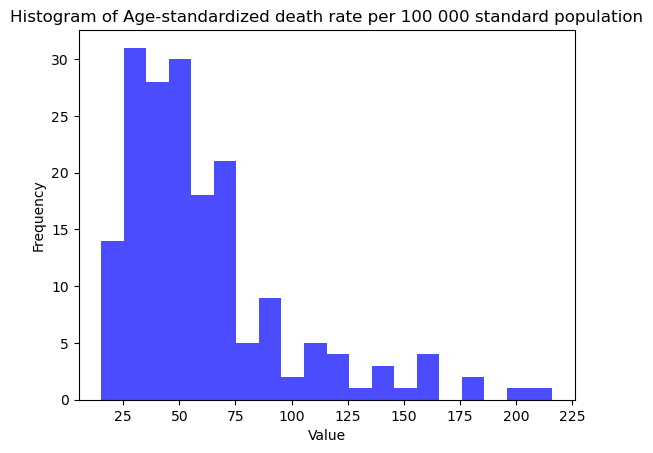

T-test for Men and Women on log-transformed data:
T-statistic: 6.796958035276427
p-value: 4.633183207600524e-10
Conclusion: There is a significant difference between Men and Women on log-transformed data.


In [19]:
test_distribution_and_compare_sexes(df1, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)


Shapiro-Wilk test p-value for Death rate per 100 000 population: 0.0005721816560253501
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 0.0004075416945852339
Log-transformed Death rate per 100 000 population is also not normally distributed.


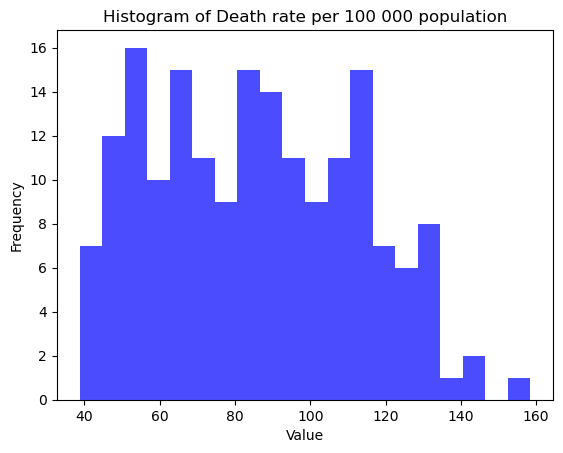

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 2464.0
p-value: 0.0004968074489638328
Conclusion: There is a significant difference between Men and Women.


In [20]:
test_distribution_and_compare_sexes(df1, 'Death rate per 100 000 population', 'Sex', alpha=0.05)


Correlation analysis

In [21]:
calculate_and_conclude_correlation(df1, 'Number', 'Age-standardized death rate per 100 000 standard population', alpha=0.05)

Correlation between Number and Age-standardized death rate per 100 000 standard population: -0.10683569159179002
Conclusion: There is a significant negative correlation between Number and Age-standardized death rate per 100 000 standard population.


In [22]:
calculate_and_conclude_correlation(df1, 'Number', 'Death rate per 100 000 population', alpha=0.05)

Correlation between Number and Death rate per 100 000 population: 0.6192696104020377
Conclusion: There is a significant positive correlation between Number and Death rate per 100 000 population.


# Noncommunicable diseases

In [23]:
df2 = pd.read_excel('Noncommunicable diseases jpn.xlsx')
df2 = df2[(df2['Year'] > 1959) & (df2['Year'] < 2020)]
df2 = df2.sort_values(by="Year", ascending=True)
df2.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],441247.0,62.446593,652.194558,472.333638
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],233463.0,61.840244,779.209533,508.882330
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],207784.0,63.142221,554.186054,437.063665
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],447197.0,64.285324,643.722575,474.303442
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],236699.0,63.653061,775.836518,511.184779
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],210498.0,65.011458,545.054375,438.711157
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],462079.0,65.057267,653.362335,485.489294
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],246175.0,64.642383,795.049330,526.645131
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],215904.0,65.536867,548.061952,445.769501
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],212901.0,68.832949,530.948805,435.157895


In [24]:
#to see if there are any missing values and see what data types we have
print(df2.info())
#no NAs we good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 199
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [25]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
df2 = df2.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df2stat = df2.drop(columns=columns_to_remove1)
grouped_stats2 = df2stat.groupby('Sex').describe()
grouped_stats2.to_excel('grouped_stats noncomm jpn.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 2.8078742109194366e-10
Shapiro-Wilk test p-value for log-transformed Number: 0.00010563119576545432
Log-transformed Number is also not normally distributed.


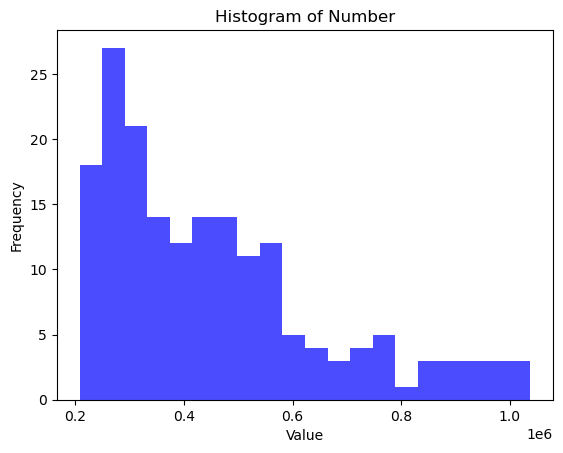

Mann-Whitney U-test for Men and Women on Number:
Statistic: 2369.0
p-value: 0.0028464519532460505
Conclusion: There is a significant difference between Men and Women.


In [26]:
test_distribution_and_compare_sexes(df2, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 3.733947612910571e-12
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 3.2778681570248824e-13
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


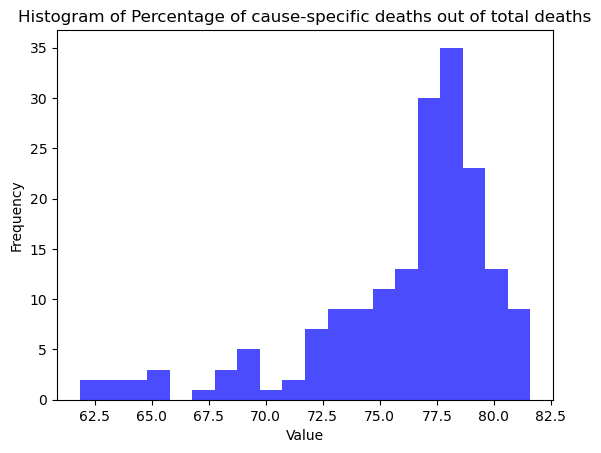

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 1558.0
p-value: 0.20496002900163146
Conclusion: There is no significant difference between Men and Women.


In [27]:
test_distribution_and_compare_sexes(df2, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 2.350934300920926e-05
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.0010066056856885552
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


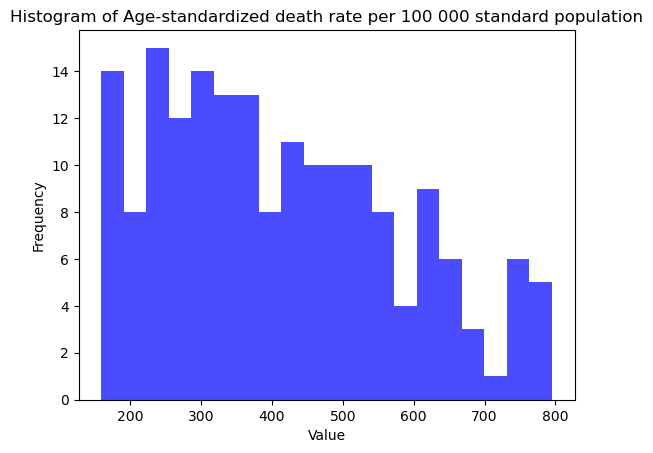

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 2920.0
p-value: 4.2067620672047805e-09
Conclusion: There is a significant difference between Men and Women.


In [28]:
test_distribution_and_compare_sexes(df2, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 4.96040208908255e-10
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 8.252602867742098e-08
Log-transformed Death rate per 100 000 population is also not normally distributed.


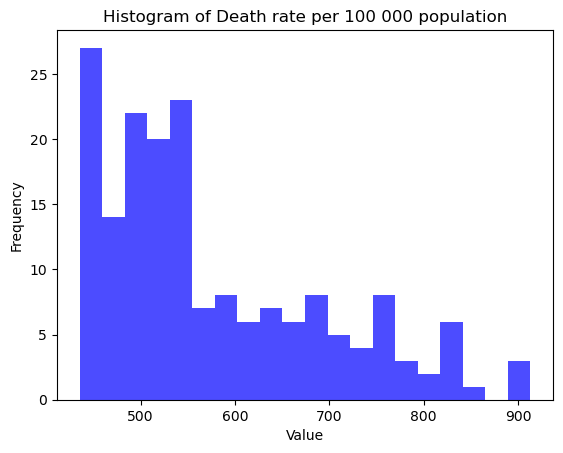

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 2819.0
p-value: 9.004907353708072e-08
Conclusion: There is a significant difference between Men and Women.


In [29]:
test_distribution_and_compare_sexes(df2, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

Correlation analysis

In [30]:
calculate_and_conclude_correlation(df2, 'Number', 'Age-standardized death rate per 100 000 standard population', alpha=0.05)


Correlation between Number and Age-standardized death rate per 100 000 standard population: -0.44787004480357057
Conclusion: There is a significant negative correlation between Number and Age-standardized death rate per 100 000 standard population.


In [31]:
calculate_and_conclude_correlation(df2, 'Number', 'Death rate per 100 000 population', alpha=0.05)


Correlation between Number and Death rate per 100 000 population: 0.5485154422479025
Conclusion: There is a significant positive correlation between Number and Death rate per 100 000 population.


## Malignant neoplasms

In [10]:
dfm = pd.read_excel('malignant neoplasms jpn.xlsx')
dfm = dfm[(dfm['Year'] > 1959) & (dfm['Year'] < 2020)]
dfm = dfm.sort_values(by="Year", ascending=True)
dfm.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],93773.0,13.271035,127.931493,100.379475
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],50898.0,13.481985,152.182007,110.943031
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],42875.0,13.029024,108.112150,90.185503
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],96442.0,13.863700,127.971651,102.287745
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],52254.0,14.052138,152.693841,112.849862
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],44188.0,13.647286,108.260467,92.094788
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],98224.0,13.829205,127.207886,103.200319
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],53499.0,14.048148,152.419286,114.451053
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],44725.0,13.576110,106.920024,92.342156
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],45859.0,14.826658,107.434195,93.733265


In [11]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group', ]
dfm = dfm.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df2stat = dfm.drop(columns=columns_to_remove1)
grouped_stats2 = df2stat.groupby('Sex').describe()
grouped_stats2.to_excel('grouped_stats malignant jpn.xlsx', sheet_name='Statistics')

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 8.883677946869284e-05
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 1.4067907159187598e-06
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


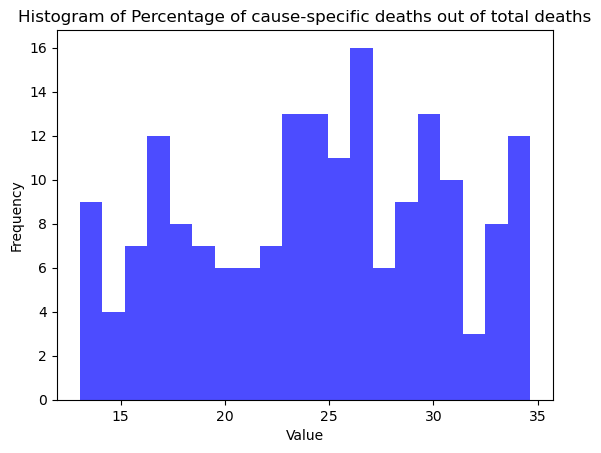

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 2612.0
p-value: 2.0509525015600042e-05
Conclusion: There is a significant difference between Men and Women.


In [12]:
test_distribution_and_compare_sexes(dfm, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 1.2541645943997537e-08
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 6.094773198128678e-06
Log-transformed Death rate per 100 000 population is also not normally distributed.


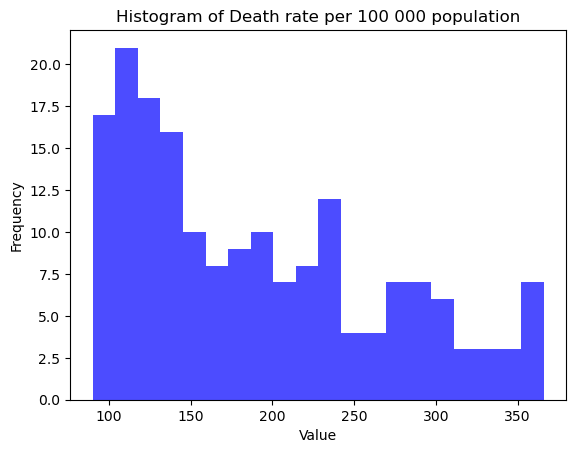

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 2730.0
p-value: 1.0683619751819129e-06
Conclusion: There is a significant difference between Men and Women.


In [13]:
test_distribution_and_compare_sexes(dfm, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

# Injuries

In [32]:
df3 = pd.read_excel('Injuries jpn.xlsx')
df3 = df3[(df3['Year'] > 1959) & (df3['Year'] < 2020)]
df3 = df3.sort_values(by="Year", ascending=True)
df3.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],60889.0,8.617193,70.797374,65.178739
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],42521.0,11.263065,101.907912,92.683575
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],18368.0,5.581740,42.182565,38.636206
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],61674.0,8.865742,70.990218,65.412314
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],43521.0,11.703661,103.259326,93.989720
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],18153.0,5.606481,41.315631,37.833726
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],56614.0,7.970828,64.475379,59.482233
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],40067.0,10.521078,94.215422,85.715814
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],16547.0,5.022781,37.259887,34.164017
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],16058.0,5.191706,35.779034,32.821666


In [33]:
#to see if there are any missing values and see what data types we have
print(df3.info())
#NA column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 199
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [35]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group']
df3 = df3.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df3stat = df3.drop(columns=columns_to_remove1)
grouped_stats3 = df3stat.groupby('Sex').describe()
grouped_stats3.to_excel('grouped_stats injuries jpn.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 2.9161983547965065e-06
Shapiro-Wilk test p-value for log-transformed Number: 4.153314492327809e-08
Log-transformed Number is also not normally distributed.


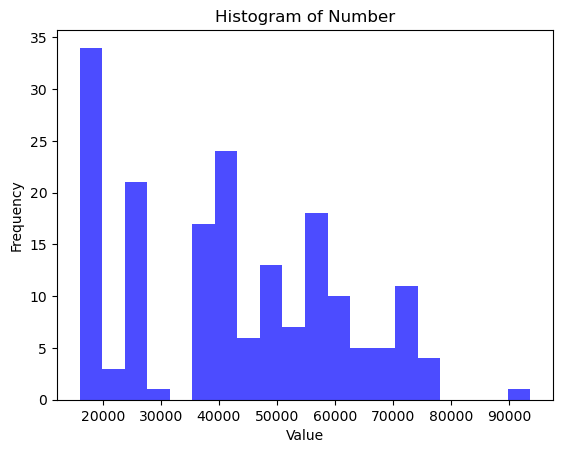

Mann-Whitney U-test for Men and Women on Number:
Statistic: 3588.0
p-value: 6.47686856789613e-21
Conclusion: There is a significant difference between Men and Women.


In [36]:
test_distribution_and_compare_sexes(df3, 'Number', 'Sex', alpha=0.05)

MultiModal distribution

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 6.885282346047461e-06
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 0.00014267700316850096
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


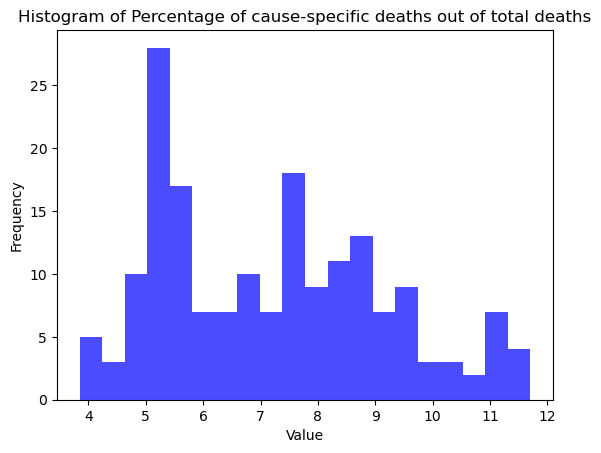

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 3583.0
p-value: 8.304898920569675e-21
Conclusion: There is a significant difference between Men and Women.


In [37]:
test_distribution_and_compare_sexes(df3, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 5.004235390515532e-07
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 0.004362037871032953
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


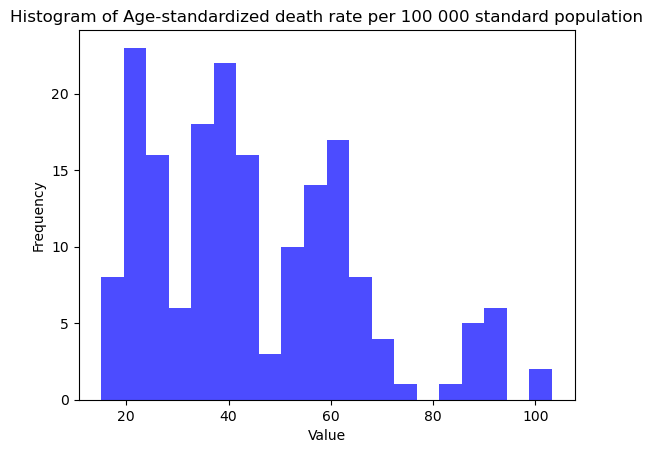

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 3588.0
p-value: 6.47686856789613e-21
Conclusion: There is a significant difference between Men and Women.


In [38]:
test_distribution_and_compare_sexes(df3, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Death rate per 100 000 population: 4.4084979890612885e-05
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 2.1969488443573937e-05
Log-transformed Death rate per 100 000 population is also not normally distributed.


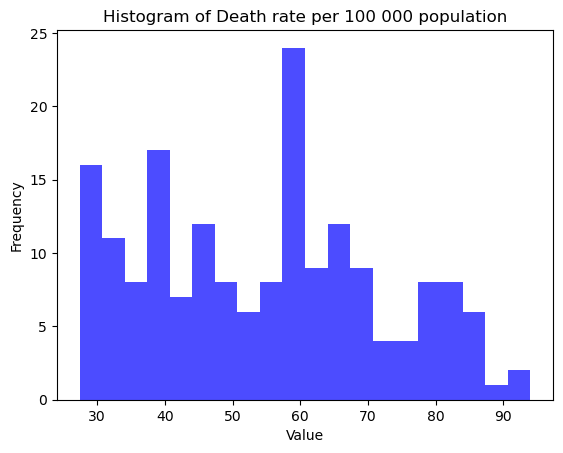

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 3600.0
p-value: 3.5565709749847226e-21
Conclusion: There is a significant difference between Men and Women.


In [39]:
test_distribution_and_compare_sexes(df3, 'Death rate per 100 000 population', 'Sex', alpha=0.05)

Correlation analysis

In [40]:
calculate_and_conclude_correlation(df3, 'Number', 'Age-standardized death rate per 100 000 standard population', alpha=0.05)

Correlation between Number and Age-standardized death rate per 100 000 standard population: 0.28923752088032795
Conclusion: There is a significant positive correlation between Number and Age-standardized death rate per 100 000 standard population.


In [41]:
calculate_and_conclude_correlation(df3, 'Number', 'Death rate per 100 000 population', alpha=0.05)


Correlation between Number and Death rate per 100 000 population: 0.5099092568700873
Conclusion: There is a significant positive correlation between Number and Death rate per 100 000 population.


# Ill-defined diseases

In [42]:
df4 = pd.read_excel('ill-defined diseases jpn.xlsx')
df4 = df4[(df['Year'] > 1959) & (df4['Year'] < 2020)]
df4 = df4.sort_values(by="Year", ascending=True)
df4.head(10)

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
30,AS,Asia,JPN,Japan,1960,All,Age_all,[All],68942.0,9.756878,141.027544,73.799087
31,AS,Asia,JPN,Japan,1960,Male,Age_all,[All],28831.0,7.636825,152.299068,62.843305
32,AS,Asia,JPN,Japan,1960,Female,Age_all,[All],40111.0,12.189089,133.629651,84.371562
33,AS,Asia,JPN,Japan,1961,All,Age_all,[All],69156.0,9.941292,135.831517,73.347828
34,AS,Asia,JPN,Japan,1961,Male,Age_all,[All],28311.0,7.613390,149.063027,61.141586
35,AS,Asia,JPN,Japan,1961,Female,Age_all,[All],40845.0,12.614813,128.410027,85.127446
36,AS,Asia,JPN,Japan,1962,All,Age_all,[All],69131.0,9.733128,133.119767,72.633382
37,AS,Asia,JPN,Japan,1962,Male,Age_all,[All],28414.0,7.461150,146.473769,60.786411
38,AS,Asia,JPN,Japan,1962,Female,Age_all,[All],40717.0,12.359496,125.398306,84.066978
41,AS,Asia,JPN,Japan,1963,Female,Age_all,[All],36649.0,11.848976,111.324762,74.908533


In [43]:
#to see if there are any missing values and see what data types we have
print(df4.info())
#NA column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 30 to 199
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  180 non-null    object 
 1   Region Name                                                  180 non-null    object 
 2   Country Code                                                 180 non-null    object 
 3   Country Name                                                 180 non-null    object 
 4   Year                                                         180 non-null    int64  
 5   Sex                                                          180 non-null    object 
 6   Age group code                                               180 non-null    object 
 7   Age group                                                    180 non-null    ob

In [44]:
#to get rid of uneccessary stuff
columns_to_remove = ['Region Code', 'Region Name','Country Code','Age group code','Age group']
df4 = df4.drop(columns=columns_to_remove)
columns_to_remove1 = ['Year']
df4stat = df4.drop(columns=columns_to_remove1)
grouped_stats4 = df4stat.groupby('Sex').describe()
grouped_stats4.to_excel('grouped_stats Ill-defined jpn.xlsx', sheet_name='Statistics')

Distributional analysis and tests to see if there are significant differences between of numeric variables for genders.

Shapiro-Wilk test p-value for Number: 5.528099120366515e-15
Shapiro-Wilk test p-value for log-transformed Number: 0.014886952005326748
Log-transformed Number is also not normally distributed.


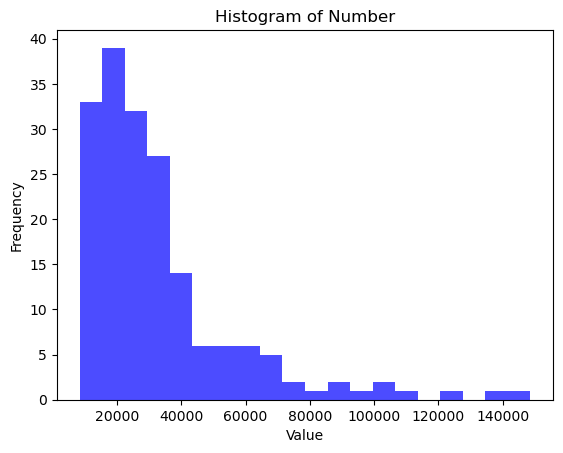

Mann-Whitney U-test for Men and Women on Number:
Statistic: 746.0
p-value: 3.212528449206104e-08
Conclusion: There is a significant difference between Men and Women.


In [45]:
test_distribution_and_compare_sexes(df4, 'Number', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Percentage of cause-specific deaths out of total deaths: 4.6685428856108047e-08
Shapiro-Wilk test p-value for log-transformed Percentage of cause-specific deaths out of total deaths: 0.0414588637650013
Log-transformed Percentage of cause-specific deaths out of total deaths is also not normally distributed.


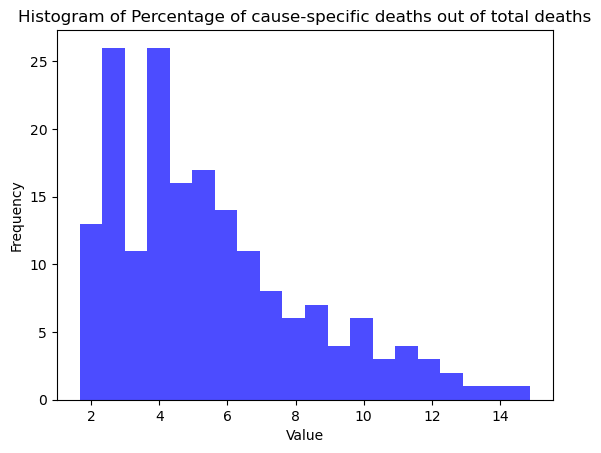

Mann-Whitney U-test for Men and Women on Percentage of cause-specific deaths out of total deaths:
Statistic: 501.0
p-value: 9.40296412125941e-12
Conclusion: There is a significant difference between Men and Women.


In [46]:
test_distribution_and_compare_sexes(df4, 'Percentage of cause-specific deaths out of total deaths', 'Sex', alpha=0.05)

Shapiro-Wilk test p-value for Age-standardized death rate per 100 000 standard population: 5.70241585393349e-16
Shapiro-Wilk test p-value for log-transformed Age-standardized death rate per 100 000 standard population: 1.6819068804352355e-08
Log-transformed Age-standardized death rate per 100 000 standard population is also not normally distributed.


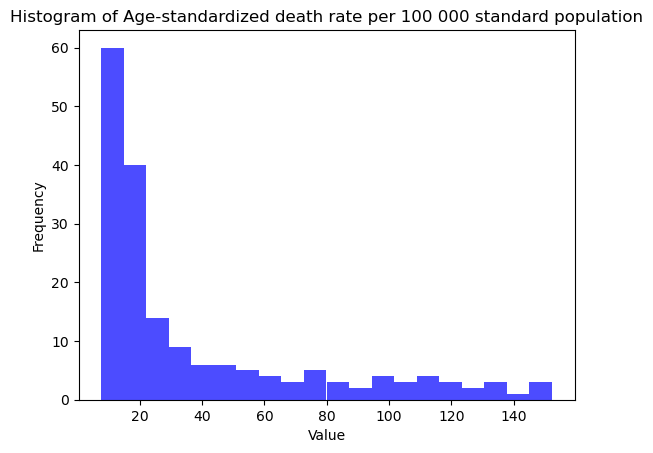

Mann-Whitney U-test for Men and Women on Age-standardized death rate per 100 000 standard population:
Statistic: 1978.0
p-value: 0.351526021642926
Conclusion: There is no significant difference between Men and Women.


In [47]:
test_distribution_and_compare_sexes(df4, 'Age-standardized death rate per 100 000 standard population', 'Sex', alpha=0.05)


Shapiro-Wilk test p-value for Death rate per 100 000 population: 5.182476626661159e-13
Shapiro-Wilk test p-value for log-transformed Death rate per 100 000 population: 0.001705147442407906
Log-transformed Death rate per 100 000 population is also not normally distributed.


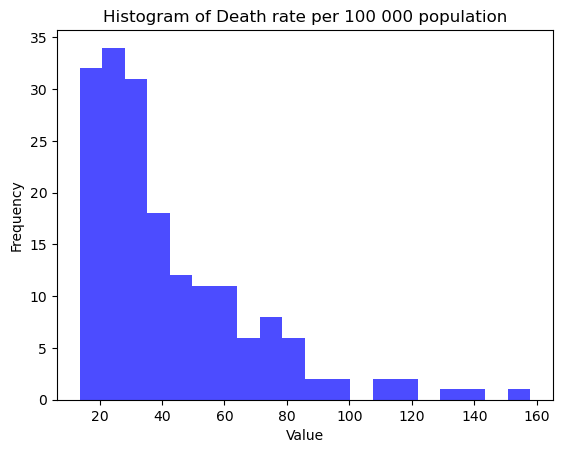

Mann-Whitney U-test for Men and Women on Death rate per 100 000 population:
Statistic: 867.0
p-value: 9.862831687837707e-07
Conclusion: There is a significant difference between Men and Women.


In [48]:
test_distribution_and_compare_sexes(df4, 'Death rate per 100 000 population', 'Sex', alpha=0.05)


Correlation analysis

In [49]:
calculate_and_conclude_correlation(df4, 'Number', 'Age-standardized death rate per 100 000 standard population', alpha=0.05)

Correlation between Number and Age-standardized death rate per 100 000 standard population: 0.12890648283024603
Conclusion: There is a significant positive correlation between Number and Age-standardized death rate per 100 000 standard population.


In [50]:
calculate_and_conclude_correlation(df4, 'Number', 'Death rate per 100 000 population', alpha=0.05)

Correlation between Number and Death rate per 100 000 population: 0.8176901270828724
Conclusion: There is a significant positive correlation between Number and Death rate per 100 000 population.
